<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Demo-running-eazy-py" data-toc-modified-id="Demo-running-eazy-py-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Demo running eazy-py</a></span><ul class="toc-item"><li><span><a href="#Setup-things" data-toc-modified-id="Setup-things-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Setup things</a></span></li><li><span><a href="#HDFN-catalog" data-toc-modified-id="HDFN-catalog-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>HDFN catalog</a></span></li><li><span><a href="#ZFOURGE-catalog" data-toc-modified-id="ZFOURGE-catalog-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>ZFOURGE catalog</a></span></li><li><span><a href="#Initialize-eazy.photoz.PhotoZ-object" data-toc-modified-id="Initialize-eazy.photoz.PhotoZ-object-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Initialize <code>eazy.photoz.PhotoZ</code> object</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Iterative-zeropoint-corrections" data-toc-modified-id="Iterative-zeropoint-corrections-1.4.0.1"><span class="toc-item-num">1.4.0.1&nbsp;&nbsp;</span>Iterative zeropoint corrections</a></span></li><li><span><a href="#Now-fit-the-whole-catalog" data-toc-modified-id="Now-fit-the-whole-catalog-1.4.0.2"><span class="toc-item-num">1.4.0.2&nbsp;&nbsp;</span>Now fit the whole catalog</a></span></li></ul></li></ul></li><li><span><a href="#zout-properties" data-toc-modified-id="zout-properties-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span><code>zout</code> properties</a></span></li></ul></li><li><span><a href="#Visualization-tool" data-toc-modified-id="Visualization-tool-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualization tool</a></span><ul class="toc-item"><li><span><a href="#static-view" data-toc-modified-id="static-view-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>static view</a></span></li></ul></li></ul></div>

# Demo running eazy-py

In [1]:
%matplotlib inline

## Setup things 

For running on cloud environments, e.g, 

<p style="float:left; margin:5px"> <a href="https://colab.research.google.com/github/gbrammer/eazy-py/blob/master/docs/examples/HDFN-demo.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="float:left"/> </a> </p>

<p style="display:inline-block; margin:5px"> <a href="https://mybinder.org/v2/gh/gbrammer/eazy-py/HEAD?filepath=docs%2Fexamples%2FHDFN-demo.ipynb"><img src="https://mybinder.org/badge_logo.svg" /> </a> </p>


In [2]:
# environment installation for hosted notebooks
# (e.g., mybinder, GoogleCollab)
import os
import sys

orig_wd = os.getcwd()

try:
    import eazy
    HAS_EAZY = True
except:
    HAS_EAZY = False

# mybinder
if ('jovyan' in orig_wd):
    if not HAS_EAZY:
        print('Install on /home/jovyan')

        os.chdir('/home/jovyan')
        ! {sys.executable} -m pip install . -r requirements.txt

        os.chdir(orig_wd)
    
    try:
        import grizli
    except:
        ! {sys.executable} -m pip install cython
        ! {sys.executable} -m pip install git+https://github.com/gbrammer/grizli
            
    try:
        print('EAZYCODE = '+os.getenv('EAZYCODE'))
    except:
        %env EAZYCODE=/home/jovyan/eazy-photoz/

# Google collab
if ('/content' in orig_wd):
    if not HAS_EAZY:
        print('Install on /content (Google Collab')

        os.chdir('/content')
        !git clone https://github.com/gbrammer/eazy-py.git --recurse-submodule
        os.chdir('/content/eazy-py')
        ! {sys.executable} -m pip install . -r requirements.txt

        os.chdir(orig_wd)
    
    try:
        import grizli
    except:
        ! {sys.executable} -m pip install cython
        ! {sys.executable} -m pip install git+https://github.com/gbrammer/grizli
            
    try:
        print('EAZYCODE = '+os.getenv('EAZYCODE'))
    except:
        %env EAZYCODE=/content/eazy-py/eazy-photoz/

try:
    import astroquery
except:
    ! {sys.executable} -m pip install astroquery

try:
    import lxml
except ImportError:
    ! pip install lxml

In [3]:
# Module versions
import importlib
import sys
import time
print(time.ctime() + '\n')

print(sys.version + '\n')

for module in ['numpy', 'scipy', 'matplotlib','astropy','eazy', 'prospect']:
    #print(module)
    mod = importlib.import_module(module)
    print('{0:>20} : {1}'.format(module, mod.__version__))


Mon Feb  7 20:13:55 2022

3.8.12 | packaged by conda-forge | (default, Jan 30 2022, 23:33:09) 
[Clang 11.1.0 ]

               numpy : 1.22.1
               scipy : 1.7.3
          matplotlib : 3.5.1
             astropy : 5.0.1
                eazy : 0.5.2.dev28
            prospect : 1.0.0


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

import eazy

# Symlink templates & filters from the eazy-code repository
try:
    print('EAZYCODE = '+os.getenv('EAZYCODE'))
except:
    pass

if not os.path.exists('templates'):
    eazy.symlink_eazy_inputs() 

EAZYCODE = /usr/local/share/python/eazy-photoz/


In [5]:
# quiet numpy/astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning

np.seterr(all='ignore')
warnings.simplefilter('ignore', category=AstropyWarning)

## HDFN catalog

Default parameters are stored in the file `eazy/data/zphot.param.default` in the repository.

Parameter that differ from defaults can be provided in a dictionary as follows.

In [6]:
params = {}
params['CATALOG_FILE'] = os.path.join(os.getenv('EAZYCODE'), 'inputs/hdfn_fs99_eazy.cat')

params['MAIN_OUTPUT_FILE'] = 'hdfn.eazypy'

# Galactic extinction
params['MW_EBV'] = 0.0103
params['CAT_HAS_EXTCORR'] = True

params['Z_STEP'] = 0.01
params['Z_MIN'] = 0.01
params['Z_MAX'] = 6.

params['PRIOR_ABZP'] = 25 
params['PRIOR_FILTER'] = 28 # K
params['PRIOR_FILE'] = 'templates/prior_K_TAO.dat'

params['TEMPLATES_FILE'] = 'templates/fsps_full/tweak_fsps_QSF_12_v3.param'

params['FIX_ZSPEC'] = False

params['IGM_SCALE_TAU'] = 1.0

translate_file = os.path.join(os.getenv('EAZYCODE'), 'inputs/zphot.translate')


## ZFOURGE catalog

Use the [ZFOURGE](https://sites.google.com/site/zfourge/) CDFS catalog from Straatman et al., pulled from [Vizier](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/zf_cdfs).

In [7]:
import pandas as pd
from grizli.catalog import query_tap_catalog

# field = 'cdfs'
field = 'uds'

radec = {'cdfs':(53.0, -27.9), 
         'uds':(34.3, -5.3)}

# Vizier Table
# https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/zf_cdfs
db = f'"J/ApJ/830/51/zf_{field}"'

# Bright mag to limit catalog size
MAX_KMAG = 22.5

# Get table from Vizier
zf = query_tap_catalog(*radec[field], radius=60, db=db, vizier=True, 
                       extra=f" AND (zspec > 0 OR FKsall > {10**(-0.4*(MAX_KMAG-25))})", verbose=True)

print(f'\nFound {len(zf)} objects in {db}')

cat_name = f'zfourge.{field}.zspec.vizier.csv'
zf.write(cat_name, overwrite=True)

Query "J/ApJ/830/51/zf_uds" from VizieR TAP server
Launched query: 'SELECT TOP 1000000 * FROM "J/ApJ/830/51/zf_uds" WHERE RAJ2000 > 33.79785317074929 AND RAJ2000 < 34.8021468292507 AND DEJ2000 > -5.8 AND DEJ2000 < -4.8  AND (zspec > 0 OR FKsall > 10.0)'
------>http
host = tapvizier.u-strasbg.fr:80
context = /TAPVizieR/tap/sync
Content-type = application/x-www-form-urlencoded
200 200
[('date', 'Mon, 07 Feb 2022 19:13:57 GMT'), ('server', 'Apache/2.4.41 (Ubuntu) mod_jk/1.2.46 OpenSSL/1.1.1f'), ('vary', 'Accept-Encoding'), ('access-control-allow-origin', '*'), ('access-control-allow-credentials', 'true'), ('transfer-encoding', 'chunked'), ('content-type', 'application/x-votable+xml; serialization=TABLEDATA;charset=UTF-8')]
Retrieving sync. results...
Saving results to: sync_20220207201357.xml
Query finished.

Found 3207 objects in "J/ApJ/830/51/zf_uds"


In [8]:
#### Update parameters

# Predefined translate file
trans_name = f'zfourge.{field}.vizier.translate.csv'
csv_trans = pd.read_csv(f'https://erda.ku.dk/vgrid/Gabriel%20Brammer/Catalogs/{trans_name}')
csv_trans.to_csv(trans_name, index=False)

# New parameters
params['MW_EBV'] = eazy.utils.get_irsa_dust(np.nanmedian(zf['ra']), np.nanmedian(zf['dec']))

params['CATALOG_FILE'] = cat_name
params['PRIOR_ABZP'] = 25
params['CATALOG_FORMAT'] = 'csv'
params['PRIOR_FILTER'] = 255
#params['TEMPLATES_FILE'] = 'templates/spline_templates_v2/tweak_spline.param'
params['MAIN_OUTPUT_FILE'] = f'zfourge.{field}'

params['SYS_ERR'] = 0.03

params['Z_MAX'] = 12.
params['Z_STEP'] = 0.005

translate_file = trans_name

/Users/gbrammer/miniconda3/envs/dash-plotly/lib/python3.8/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


## Initialize `eazy.photoz.PhotoZ` object

In [9]:
self = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_file, zeropoint_file=None, 
                          params=params, load_prior=True, load_products=False)

Read default param file: /Users/gbrammer/miniconda3/envs/dash-plotly/lib/python3.8/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: zfourge.uds.zspec.vizier.csv
   >>> NOBJ = 3207
F8_0 e_F8_0 ( 21): IRAC/irac_tr4_2004-08-09.dat
F5_8 e_F5_8 ( 20): IRAC/irac_tr3_2004-08-09.dat
F4_5 e_F4_5 ( 19): IRAC/irac_tr2_2004-08-09.dat
F3_6 e_F3_6 ( 18): IRAC/irac_tr1_2004-08-09.dat
FKs e_FKs (255): FOURSTAR/Ks_cam_optics_sky.txt
FKsHI e_FKsHI (269): VLT/hawki_k_ETC.dat
FJ1 e_FJ1 (249): FOURSTAR/J1_cam_optics_sky.txt
FJ2 e_FJ2 (250): FOURSTAR/J2_cam_optics_sky.txt
FJ3 e_FJ3 (251): FOURSTAR/J3_cam_optics_sky.txt
FHs e_FHs (254): FOURSTAR/Hshort_cam_optics_sky.txt
FHl e_FHl (253): FOURSTAR/Hlong_cam_optics_sky.txt
Fu e_Fu ( 88): megaprime/cfht_mega_u_cfh9301.dat
FB e_FB (122): UKIDSS/B_qe.txt
FV e_FV ( 79): COSMOS/SUBARU_filter_V.txt
FR e_FR (123): UKIDSS/R_qe.txt
Fi e_Fi (124): UKIDSS/i_qe.txt
Fz e_Fz (125): UKIDSS/z_qe.txt
FY e_FY (266): VLT/hawki_y_ETC.dat
FJ e_FJ (263): UKIDSS/Table0

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:11<00:00,  1.02it/s]


Template   0: tweak_fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: tweak_fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: tweak_fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: tweak_fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: tweak_fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: tweak_fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: tweak_fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: tweak_fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: tweak_fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: tweak_fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: tweak_fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: tweak_fsps_QSF_12_v3_012.dat (NZ=1).
Process templates: 12.058 s


511it [00:00, 1203.41it/s]


#### Iterative zeropoint corrections

Iteration:  0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 511/511 [00:24<00:00, 20.76it/s]


Compute best fits
fit_best: 0.6 s (n_proc=1,  NOBJ=3111)
Fit 25.6 s (n_proc=8, NOBJ=3203)
Iterative correction - zeropoint / template
Iteration:  1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 511/511 [00:27<00:00, 18.86it/s]


Compute best fits
fit_best: 0.5 s (n_proc=1,  NOBJ=3113)
Fit 28.1 s (n_proc=8, NOBJ=3203)
Iterative correction - zeropoint / template
Iteration:  2


 29%|██████████████████████████████████████████▊                                                                                                           | 146/511 [00:10<00:22, 16.58it/s]


 NNLS quitting on iteration count.

 NNLS quitting on iteration count.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 511/511 [00:27<00:00, 18.48it/s]


Compute best fits
fit_best: 0.6 s (n_proc=1,  NOBJ=3114)
Fit 28.7 s (n_proc=8, NOBJ=3203)
Iterative correction - zeropoint / template


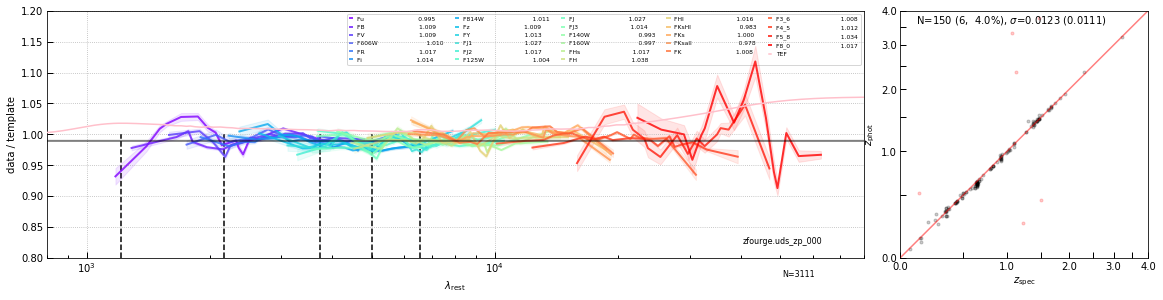

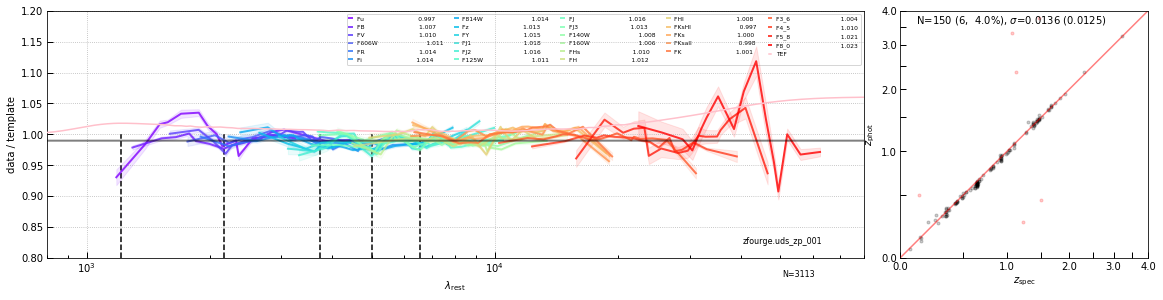

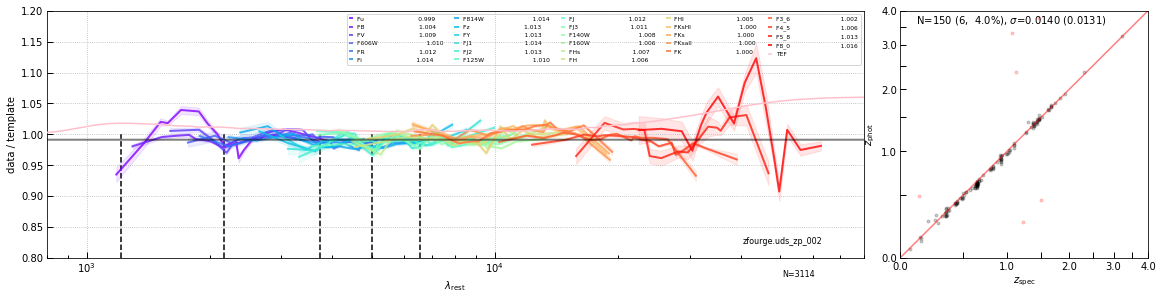

In [10]:
NITER = 3
NBIN = np.minimum(self.NOBJ//100, 180)

self.param.params['VERBOSITY'] = 1.
for iter in range(NITER):
    print('Iteration: ', iter)
    
    sn = self.fnu/self.efnu
    clip = (sn > 1).sum(axis=1) > 4 # Generally make this higher to ensure reasonable fits
    self.iterate_zp_templates(idx=self.idx[clip], update_templates=False, 
                              update_zeropoints=True, iter=iter, n_proc=8, 
                              save_templates=False, error_residuals=False, 
                              NBIN=NBIN, get_spatial_offset=False)

#### Now fit the whole catalog

In [11]:
# Turn off error corrections derived above
self.set_sys_err(positive=True)

# Full catalog
sample = np.isfinite(self.ZSPEC)

# fit_parallel renamed to fit_catalog 14 May 2021
self.fit_catalog(self.idx[sample], n_proc=8)

Set sys_err = 0.03 (positive=True)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 511/511 [00:26<00:00, 19.25it/s]


Compute best fits
fit_best: 0.6 s (n_proc=1,  NOBJ=3113)
Fit 27.5 s (n_proc=8, NOBJ=3207)


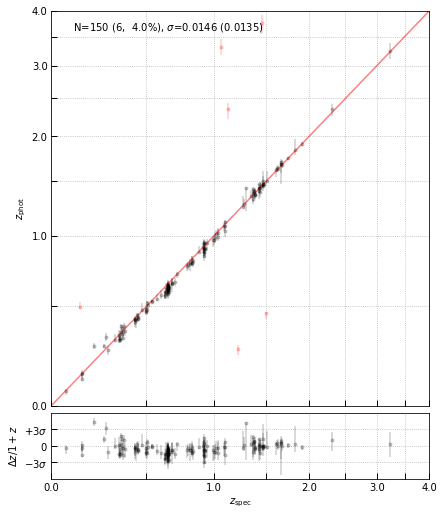

In [12]:
# Show zspec-zphot comparison
fig = self.zphot_zspec()

In [13]:
# Derived parameters (z params, RF colors, masses, SFR, etc.)
warnings.simplefilter('ignore', category=RuntimeWarning)
zout, hdu = self.standard_output(simple=False, 
                                 rf_pad_width=0.5, rf_max_err=2, 
                                 prior=True, beta_prior=True, 
                                 absmag_filters=[], 
                                 extra_rf_filters=[])

# 'zout' also saved to [MAIN_OUTPUT_FILE].zout.fits

Get best fit coeffs & best redshifts
fit_best: 1.8 s (n_proc=1,  NOBJ=3117)
Get parameters (UBVJ=[153, 154, 155, 161], simple=False)


 27%|███████████████████████████████████████▋                                                                                                            | 835/3117 [00:05<00:16, 134.72it/s]


 NNLS quitting on iteration count.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3117/3117 [00:23<00:00, 133.79it/s]


Text(0, 0.5, '$(U-V)_0$')

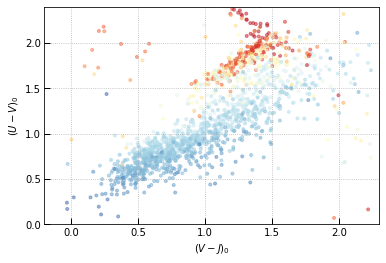

In [14]:
# Show UVJ diagram
uv = -2.5*np.log10(zout['restU']/zout['restV'])
vj = -2.5*np.log10(zout['restV']/zout['restJ'])
ssfr = zout['sfr']/zout['mass']

sel = (zout['z_phot'] > 0.2) & (zout['z_phot'] < 1)
plt.scatter(vj[sel], uv[sel], c=np.log10(ssfr)[sel], 
            vmin=-13, vmax=-8, alpha=0.5, cmap='RdYlBu')

plt.xlim(-0.2, 2.3); plt.ylim(0, 2.4); plt.grid()
plt.xlabel(r'$(V-J)_0$'); plt.ylabel(r'$(U-V)_0$')    

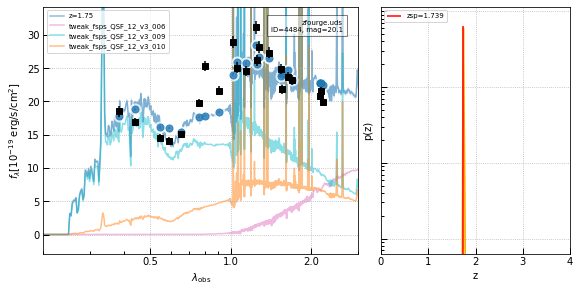

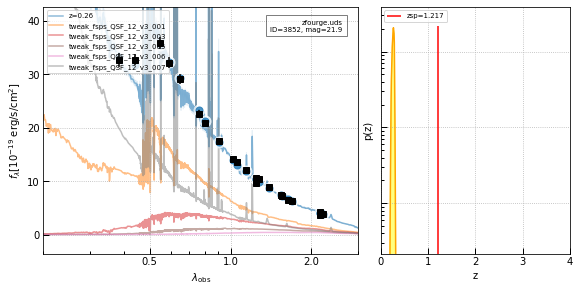

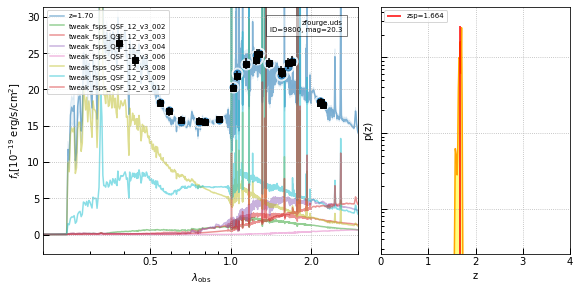

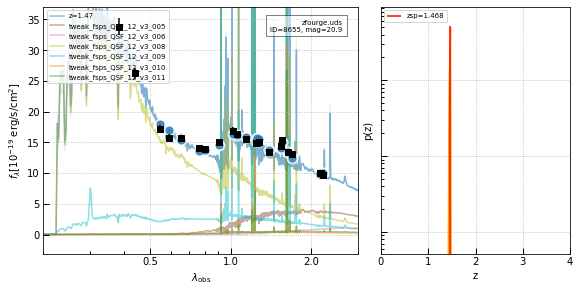

In [15]:
# Show brightest objects with z_spec > 1

ifilter = self.flux_columns[np.argmin((self.lc - 8140)**2)]

imag = params['PRIOR_ABZP'] - 2.5*np.log10(self.cat[ifilter])
sel = (self.ZSPEC > 1.1)

so = np.argsort(imag[sel])
ids = self.OBJID[sel][so]

for i in range(4):
    fig, data = self.show_fit(ids[i], xlim=[0.2, 3], show_components=True,
                              logpz=True, zr=[0,4])

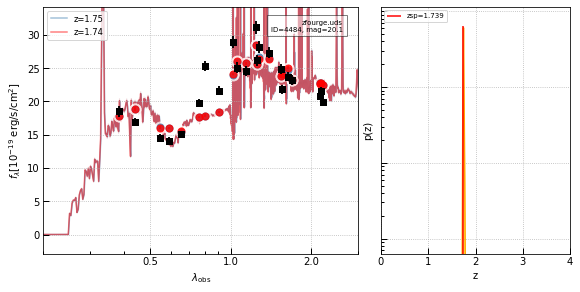

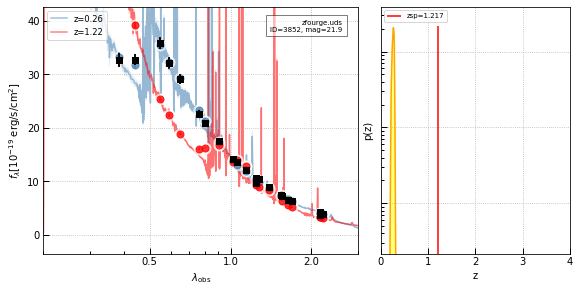

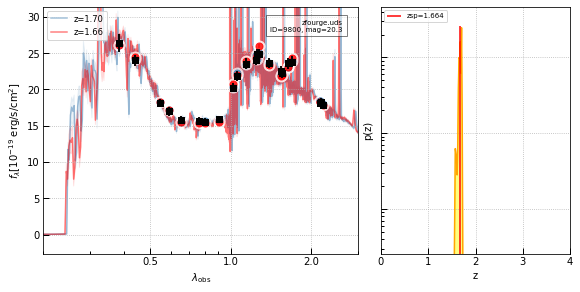

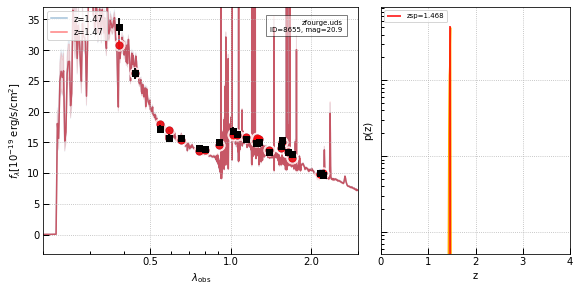

In [16]:
# Compare forced fit at z_spec
for i in range(4):
    ix = np.where(self.OBJID == ids[i])[0][0]
    fig, data = self.show_fit(ids[i], xlim=[0.2, 3], 
                        show_components=False,
                        template_color='steelblue', logpz=True, zr=[0,4])

    # Now show with z_spec
    axes = fig.axes[:1]
    res = self.show_fit(ids[i], xlim=[0.2, 3], axes=axes,
                        zshow=self.ZSPEC[ix], 
                        show_components=False,
                        template_color='r')

    axes[0].legend(loc='upper left')

## `zout` properties

In [17]:
zout.meta

OrderedDict([('version', ('0.5.2.dev28', 'Eazy-py version')),
             ('prior', (True, 'Prior applied (templates/prior_K_TAO.dat)')),
             ('betprior', (True, 'Beta prior applied')),
             ('fitter', ('nnls', 'Optimization method for template fits')),
             ('SYS_ERR', 0.03),
             ('TEMP_ERR_FILE', 'templates/uvista_nmf/template_error_10.def'),
             ('TEMP_ERR_A2', 0.2),
             ('PRIOR_FILTER', 255),
             ('PRIOR_ABZP', 25),
             ('IGM_SCALE_TAU', 1.0),
             ('APPLY_IGM', 'y'),
             ('TEMPLATES_FILE',
              'templates/fsps_full/tweak_fsps_QSF_12_v3.param'),
             ('TEMPL000', 'tweak_fsps_QSF_12_v3_001.dat'),
             ('TEMPL001', 'tweak_fsps_QSF_12_v3_002.dat'),
             ('TEMPL002', 'tweak_fsps_QSF_12_v3_003.dat'),
             ('TEMPL003', 'tweak_fsps_QSF_12_v3_004.dat'),
             ('TEMPL004', 'tweak_fsps_QSF_12_v3_005.dat'),
             ('TEMPL005', 'tweak_fsps_QSF_12_v3_006.

In [18]:
zout.colnames

['id',
 'ra',
 'dec',
 'z_spec',
 'nusefilt',
 'z_ml',
 'z_ml_chi2',
 'z_ml_risk',
 'lc_min',
 'lc_max',
 'z_phot',
 'z_phot_chi2',
 'z_phot_risk',
 'z_min_risk',
 'min_risk',
 'z_raw_chi2',
 'raw_chi2',
 'z025',
 'z160',
 'z500',
 'z840',
 'z975',
 'restU',
 'restU_err',
 'restB',
 'restB_err',
 'restV',
 'restV_err',
 'restJ',
 'restJ_err',
 'dL',
 'Lv',
 'mass',
 'sfr',
 'LIR',
 'energy_abs',
 'Av',
 'lw_age_V',
 'MLv',
 'Lv_p',
 'mass_p',
 'LIR_p',
 'sfr_p',
 'Av_p',
 'ssfr_p']

# Visualization tool

Interactive tool added February 2022 for exploring the catalog and photo-z outputs with [Plotly/Dash](https://plotly.com/dash/).


In [19]:
try:
    import jupyter_dash
except ImportError:
    ! pip install dash==2.0
    ! pip install jupyter-dash

In [20]:
import eazy.visualization
from importlib import reload
reload(eazy.visualization)

zout['jh'] = (-2.5*np.log10(self.cat['FJ1']/self.cat['FHs'])) #.filled(-1.)
zout['hk'] = (-2.5*np.log10(self.cat['FHs']/self.cat['FKs'])) #.filled(-1.)

bband = self.flux_columns[np.nanargmin((self.lc - 4500)**2)]
zband = self.flux_columns[np.nanargmin((self.lc - 9000)**2)]
zout['Bz'] = (-2.5*np.log10(self.cat[bband]/self.cat[zband])) #.filled(-1.)
zout['zK'] = (-2.5*np.log10(self.cat[zband]/self.cat['FKs'])) #.filled(-1.)

extra_plots = {
               'JH-redshift': ('z_phot','jh','z<sub>phot</sub>', '(J1-Hs)<sub>obs</sub>', (0, 4), (-0.1, 1.9)),
               'HK-redshift': ('z_phot','hk','z<sub>phot</sub>', '(Hs-Ks)<sub>obs</sub>', (0, 4), (-0.1, 1.9)),
               'BzK': ('Bz','zK',f'{bband} - {zband}', f'{zband} - K<sub>s</sub>', (-0.5, 5), (-0.5, 5)),
              }

for c in ['jh','hk', 'zK','Bz']:
    if hasattr(zout[c], 'mask'):
        zout[c].fill_value = -1.
    
sel = (zf['Use'] > -1)

vis = eazy.visualization.EazyExplorer(self, zout, extra_plots=extra_plots, 
                                      selection=sel)

if 1:
    app = vis.make_dash_app(server_mode='inline', plot_height=450,
                        infer_proxy=os.getcwd().startswith('/content'))


## static view

![static_viewer](dash_viewer.png)


In [24]:
# Run host locally
if 0:
    app = vis.make_dash_app(server_mode='external', plot_height=500, 
                        infer_proxy=os.getcwd().startswith('/content'))